In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams["figure.figsize"]=30,16
import warnings
warnings.filterwarnings('ignore')
rcParams["figure.figsize"]=30,16
from scipy import stats

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Final_features_v2.xlsx')
df.head()

,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,...,NumberOfBankStatements,BankStatement_MA_OverdraftDays,BankStatement_MA_NumReturnItems,Credit_Score__c,Time_in_Business__c,Is_this_Business_home_based__c,HB_with_LCF_Payment__c,Contract_HoldBack__c,AvgMonthRevenue,WriteOff_YN
0,100.0,0.61,534.0,1,4,1,0.0,NaN,NaN,3320.50,...,3,2.0,1.333333,533.0,18.51,0,223.08,40,1873.33,0
1,100.0,0.55,537.0,1,0,2,0.0,NaN,NaN,1008.71,...,3,0.0,0.000000,537.0,1.16,0,56.37,18,11316.67,1
2,100.0,0.36,0.0,2,0,2,0.0,NaN,NaN,12989.58,...,0,0.0,0.000000,0.0,9.22,0,0.00,12,NaN,1
3,100.0,0.54,0.0,1,0,2,0.0,NaN,NaN,1526.84,...,3,3.0,0.000000,0.0,1.76,0,0.00,12,NaN,1
4,100.0,0.61,524.0,1,0,1,0.0,NaN,NaN,4351.47,...,1,0.0,0.000000,524.0,5.01,0,0.00,12,NaN,1


In [ ]:
df.shape

(2883, 21)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Renewal_PreviousHBwoLCF                1117
Renewal_PreviousAvgMonthRevenue         527
Renewal_PreviousPaidPercentageOfRTR     394
AvgMonthRevenue                         337
Renewal_PreviousAvgDailyBalance         290
Renewal_PreviousPace                      0
BankStatement_MA_NumReturnItems           0
Contract_HoldBack__c                      0
HB_with_LCF_Payment__c                    0
Is_this_Business_home_based__c            0
Time_in_Business__c                       0
Credit_Score__c                           0
Renewal_TwoWeekBounces                    0
BankStatement_MA_OverdraftDays            0
NumberOfBankStatements                    0
Renewal_PreviousHBwLCF                    0
Renewal_PreviousPosition                  0
Renewal_PreviousCountBounces              0
Renewal_CountPreviousDeals                0
Renewal_PreviousCreditScore               0
WriteOff_YN                               0
dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100 


Renewal_PreviousHBwoLCF                38.744364
Renewal_PreviousAvgMonthRevenue        18.279570
Renewal_PreviousPaidPercentageOfRTR    13.666320
AvgMonthRevenue                        11.689213
Renewal_PreviousAvgDailyBalance        10.058966
Renewal_PreviousPace                    0.000000
BankStatement_MA_NumReturnItems         0.000000
Contract_HoldBack__c                    0.000000
HB_with_LCF_Payment__c                  0.000000
Is_this_Business_home_based__c          0.000000
Time_in_Business__c                     0.000000
Credit_Score__c                         0.000000
Renewal_TwoWeekBounces                  0.000000
BankStatement_MA_OverdraftDays          0.000000
NumberOfBankStatements                  0.000000
Renewal_PreviousHBwLCF                  0.000000
Renewal_PreviousPosition                0.000000
Renewal_PreviousCountBounces            0.000000
Renewal_CountPreviousDeals              0.000000
Renewal_PreviousCreditScore             0.000000
WriteOff_YN         

In [ ]:
df.drop(columns= ['Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue'], inplace=True, axis=1)

In [ ]:
df.shape

(2883, 19)

In [ ]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100 

Renewal_PreviousPaidPercentageOfRTR    13.666320
AvgMonthRevenue                        11.689213
Renewal_PreviousAvgDailyBalance        10.058966
Renewal_PreviousPace                    0.000000
BankStatement_MA_NumReturnItems         0.000000
Contract_HoldBack__c                    0.000000
HB_with_LCF_Payment__c                  0.000000
Is_this_Business_home_based__c          0.000000
Time_in_Business__c                     0.000000
Credit_Score__c                         0.000000
NumberOfBankStatements                  0.000000
BankStatement_MA_OverdraftDays          0.000000
Renewal_TwoWeekBounces                  0.000000
Renewal_PreviousHBwLCF                  0.000000
Renewal_PreviousPosition                0.000000
Renewal_PreviousCountBounces            0.000000
Renewal_CountPreviousDeals              0.000000
Renewal_PreviousCreditScore             0.000000
WriteOff_YN                             0.000000
dtype: float64

# Plotting the distribution of data having missing values.

In [ ]:
# Function will plot the distributions of a given feature
def plot_distribution(df_feature):
  plt.figure(figsize=(20,10))
  plt.subplot(2,2,1)
  sns.distplot(df_feature)
  plt.subplot(2,2,2)
  sns.boxplot(df_feature)
  plt.show()

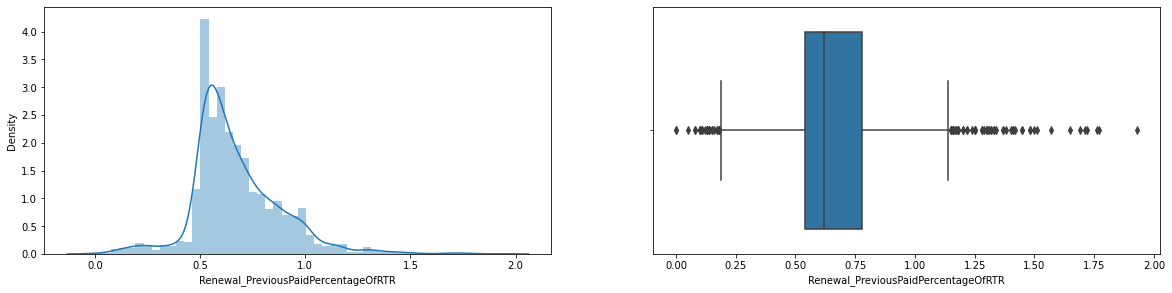

In [ ]:
plot_distribution(df['Renewal_PreviousPaidPercentageOfRTR'])

In [ ]:
print('Mean :', df['Renewal_PreviousPaidPercentageOfRTR'].mean(), '\n') 
print('Median :', df['Renewal_PreviousPaidPercentageOfRTR'].median(), '\n')
print('Mode :', df['Renewal_PreviousPaidPercentageOfRTR'].mode(), '\n')
print('---------------------------------------------')
print(df['Renewal_PreviousPaidPercentageOfRTR'].value_counts())

Mean : 0.6715508236239454 

Median : 0.62 

Mode : 0    0.52
dtype: float64 

---------------------------------------------
0.52    119
0.53    118
0.51    103
0.60     99
0.56     88
       ... 
1.24      1
1.34      1
1.69      1
0.12      1
1.42      1
Name: Renewal_PreviousPaidPercentageOfRTR, Length: 140, dtype: int64


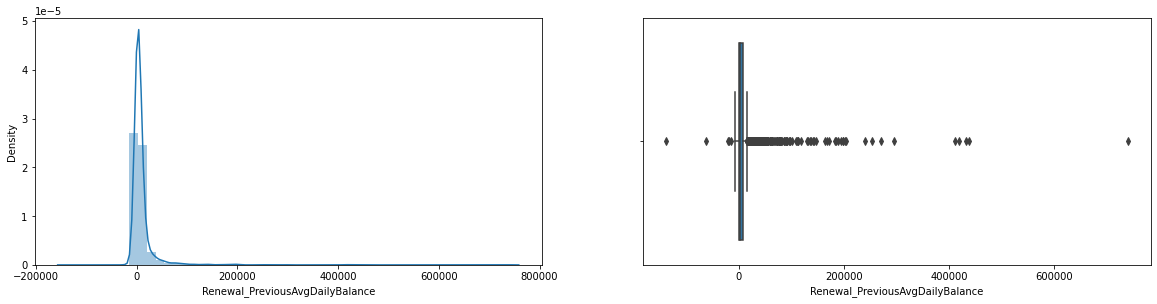

In [ ]:
plot_distribution(df['Renewal_PreviousAvgDailyBalance'])

In [ ]:

print('Mean :', df['Renewal_PreviousAvgDailyBalance'].mean(), '\n') 
print('Median :', df['Renewal_PreviousAvgDailyBalance'].median(), '\n')
print('Mode :', df['Renewal_PreviousAvgDailyBalance'].mode(), '\n')
print('---------------------------------------------')
print(df['Renewal_PreviousAvgDailyBalance'].value_counts())

Mean : 9671.673910528345 

Median : 3015.33 

Mode : 0    0.0
dtype: float64 

---------------------------------------------
0.00        99
3753.33      3
2419.67      2
1047.00      2
635.00       2
            ..
8272.33      1
16063.40     1
227.33       1
5361.33      1
7279.44      1
Name: Renewal_PreviousAvgDailyBalance, Length: 2464, dtype: int64


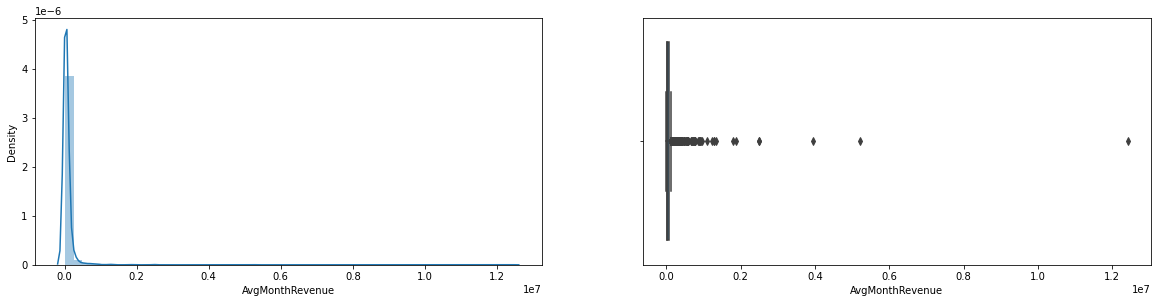

In [ ]:
plot_distribution(df['AvgMonthRevenue'])

In [ ]:
print('Mean :', df['AvgMonthRevenue'].mean(), '\n') 
print('Median :', df['AvgMonthRevenue'].median(), '\n')
print('Mode :', df['AvgMonthRevenue'].mode(), '\n')
print('---------------------------------------------')
print(df['AvgMonthRevenue'].value_counts())

Mean : 70296.6588138256 

Median : 27335.53 

Mode : 0    0.0
dtype: float64 

---------------------------------------------
0.00        18
23838.18     4
20164.09     3
13939.82     3
53346.46     2
            ..
63823.00     1
99183.50     1
18505.00     1
73579.00     1
94354.34     1
Name: AvgMonthRevenue, Length: 2497, dtype: int64


# Impute the missing values by their mean and median according to data distribution. 

In [ ]:
# Renewal_PreviousPaidPercentageOfRTR    
# AvgMonthRevenue                        
# Renewal_PreviousAvgDailyBalance     

In [ ]:
df[df['Renewal_PreviousPaidPercentageOfRTR'].isnull()]

,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,NumberOfBankStatements,BankStatement_MA_OverdraftDays,BankStatement_MA_NumReturnItems,Credit_Score__c,Time_in_Business__c,Is_this_Business_home_based__c,HB_with_LCF_Payment__c,Contract_HoldBack__c,AvgMonthRevenue,WriteOff_YN
24,100.00,NaN,546.989184,2,0,2,0.00,NaN,0,3,0.000000,0.000000,562.0,8.19,0,3.51,12,77695.00,0
26,100.00,NaN,467.000000,2,1,1,0.00,594.05,0,0,0.000000,0.000000,467.0,13.03,0,0.00,12,NaN,0
40,100.00,NaN,631.000000,1,2,4,0.00,7809.76,0,3,2.333333,1.666666,563.0,39.14,0,0.00,12,NaN,0
42,100.00,NaN,504.000000,1,0,1,0.00,483.56,0,3,2.333333,1.000000,504.0,39.73,0,0.00,12,NaN,0
43,100.00,NaN,546.989184,4,0,2,0.00,NaN,0,3,0.000000,0.000000,621.0,12.61,0,0.00,12,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,100.00,NaN,682.000000,2,0,2,41.42,11266.33,0,3,0.000000,0.000000,673.0,12.65,0,14.68,15,49727.31,0
2832,100.00,NaN,715.000000,1,0,11,28.78,419375.00,0,1,0.000000,0.000000,715.0,14.43,1,28.61,29,725498.51,0
2834,100.00,NaN,611.000000,2,0,1,17.51,3247.12,0,3,0.000000,0.000000,584.0,1.49,1,17.28,17,23045.17,0
2847,100.00,NaN,601.000000,1,0,2,28.33,1554.79,0,5,0.200000,0.000000,611.0,2.07,1,39.82,40,6287.00,0


In [ ]:
df['Renewal_PreviousPaidPercentageOfRTR'].isnull().sum()

394

In [ ]:

df['Renewal_PreviousPaidPercentageOfRTR'].fillna(df['Renewal_PreviousPaidPercentageOfRTR'].mean(), inplace = True)

In [ ]:
df['Renewal_PreviousPaidPercentageOfRTR'].isnull().sum()

0

In [ ]:
df['Renewal_PreviousPaidPercentageOfRTR'][24:27]

24    0.671551
25    0.500000
26    0.671551
Name: Renewal_PreviousPaidPercentageOfRTR, dtype: float64

In [ ]:
df['AvgMonthRevenue'].isnull().sum()

337

In [ ]:
df['AvgMonthRevenue'].fillna(df['AvgMonthRevenue'].median(), inplace = True)

In [ ]:
df['AvgMonthRevenue'].isnull().sum()


0

In [ ]:
df['Renewal_PreviousAvgDailyBalance'].isnull().sum()

290

In [ ]:
df['Renewal_PreviousAvgDailyBalance'].fillna(df['Renewal_PreviousAvgDailyBalance'].median(), inplace = True)

In [ ]:
df['Renewal_PreviousAvgDailyBalance'].isnull().sum()

0

In [ ]:
df.isnull().sum()

Renewal_PreviousPace                   0
Renewal_PreviousPaidPercentageOfRTR    0
Renewal_PreviousCreditScore            0
Renewal_CountPreviousDeals             0
Renewal_PreviousCountBounces           0
Renewal_PreviousPosition               0
Renewal_PreviousHBwLCF                 0
Renewal_PreviousAvgDailyBalance        0
Renewal_TwoWeekBounces                 0
NumberOfBankStatements                 0
BankStatement_MA_OverdraftDays         0
BankStatement_MA_NumReturnItems        0
Credit_Score__c                        0
Time_in_Business__c                    0
Is_this_Business_home_based__c         0
HB_with_LCF_Payment__c                 0
Contract_HoldBack__c                   0
AvgMonthRevenue                        0
WriteOff_YN                            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2883 entries, 0 to 2882
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Renewal_PreviousPace                 2883 non-null   float64
 1   Renewal_PreviousPaidPercentageOfRTR  2883 non-null   float64
 2   Renewal_PreviousCreditScore          2883 non-null   float64
 3   Renewal_CountPreviousDeals           2883 non-null   int64  
 4   Renewal_PreviousCountBounces         2883 non-null   int64  
 5   Renewal_PreviousPosition             2883 non-null   int64  
 6   Renewal_PreviousHBwLCF               2883 non-null   float64
 7   Renewal_PreviousAvgDailyBalance      2883 non-null   float64
 8   Renewal_TwoWeekBounces               2883 non-null   int64  
 9   NumberOfBankStatements               2883 non-null   int64  
 10  BankStatement_MA_OverdraftDays       2883 non-null   float64
 11  BankStatement_MA_NumReturnItem

# Now applying Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [ ]:
df.shape

(2883, 19)

In [ ]:
X = df.drop(columns=['WriteOff_YN'], axis=1)
X

,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,NumberOfBankStatements,BankStatement_MA_OverdraftDays,BankStatement_MA_NumReturnItems,Credit_Score__c,Time_in_Business__c,Is_this_Business_home_based__c,HB_with_LCF_Payment__c,Contract_HoldBack__c,AvgMonthRevenue
0,100.00,0.61,534.0,1,4,1,0.00,3320.50,1,3,2.0,1.333333,533.000000,18.51,0,223.08,40,1873.33
1,100.00,0.55,537.0,1,0,2,0.00,1008.71,0,3,0.0,0.000000,537.000000,1.16,0,56.37,18,11316.67
2,100.00,0.36,0.0,2,0,2,0.00,12989.58,0,0,0.0,0.000000,0.000000,9.22,0,0.00,12,27335.53
3,100.00,0.54,0.0,1,0,2,0.00,1526.84,0,3,3.0,0.000000,0.000000,1.76,0,0.00,12,27335.53
4,100.00,0.61,524.0,1,0,1,0.00,4351.47,0,1,0.0,0.000000,524.000000,5.01,0,0.00,12,27335.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,100.00,0.56,611.0,1,0,1,31.13,13320.00,0,1,0.0,0.000000,611.000000,0.91,0,39.65,40,6763.58
2879,77.93,0.56,659.0,2,15,1,9.92,14148.95,0,3,20.0,19.333333,523.000000,1.03,1,4.44,12,880725.23
2880,100.00,0.52,736.0,2,0,4,13.69,2458.92,0,1,3.0,0.000000,1.000000,12.91,1,13.24,13,29542.38
2881,100.00,0.55,641.0,1,0,1,13.13,3442.59,0,1,1.0,0.000000,548.857043,1.52,1,14.13,14,72944.80


In [ ]:
y = df['WriteOff_YN']
y

0       0
1       1
2       1
3       1
4       1
       ..
2878    1
2879    1
2880    0
2881    0
2882    0
Name: WriteOff_YN, Length: 2883, dtype: int64

# Splitting the data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(2018, 18)
(865, 18)


In [ ]:
# Skewness in Writeoff_YN (74% - 0 and 26% - 1)
print(y_train.value_counts(normalize=True).round(2))
print(' ')
print(y_test.value_counts(normalize=True).round(2))

0    0.74
1    0.26
Name: WriteOff_YN, dtype: float64
 
0    0.75
1    0.25
Name: WriteOff_YN, dtype: float64


In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.22935356, -0.36552325,  0.20455327, ..., -0.3163526 ,
        -0.90489723, -0.05699244],
       [ 0.22935356,  2.47601316, -3.49941182, ..., -0.10027114,
        -0.90489723, -0.14780595],
       [ 0.22935356, -0.36552325,  0.62749738, ...,  0.26077637,
         0.10740603,  0.50362133],
       ...,
       [-0.15087275,  1.10598668,  0.25581922, ..., -0.24017705,
        -0.79241909, -0.13725324],
       [ 0.22935356, -0.61923186,  0.4416583 , ..., -0.16003544,
        -0.11755025, -0.13090271],
       [ 0.22935356,  2.17156283,  0.85819417, ...,  1.0080353 ,
         0.33236231, -0.07411604]])

# Find out the best parameters and weights for Logistic Regression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(logmodel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')

In [ ]:
print (f'Accuracy - : {best_clf.score(X_train,y_train):.3f}')

Accuracy - : 0.739


In [ ]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')


Accuracy - : 0.742


# Now performing Logistic Regression

In [ ]:
lg = LogisticRegression(C=0.001, class_weight='balanced', solver='newton-cg')

In [ ]:
lg.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', solver='newton-cg')

# For Training data

In [ ]:
y_pred_train = lg.predict(X_train)

In [ ]:
confusion_matrix(y_train, y_pred_train)

array([[835, 656],
       [181, 346]])

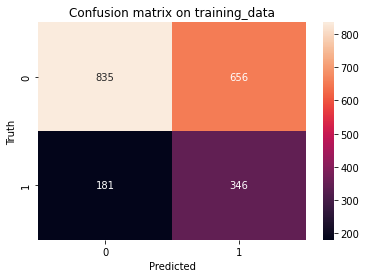

----------------------------
TP: 346
TN: 835
FP: 656
FN: 181
F1-score: 0.45258338783518637
accuracy: 0.5852329038652131


In [ ]:
# this is the confusion matrix for training data 

sns.heatmap(confusion_matrix(y_train,y_pred_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))


print('F1-score: {}'.format(f1_score(y_pred_train,y_train)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.56      0.67      1491
           1       0.35      0.66      0.45       527

    accuracy                           0.59      2018
   macro avg       0.58      0.61      0.56      2018
weighted avg       0.70      0.59      0.61      2018



# For Test data

In [ ]:

y_pred = lg.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[378, 270],
       [ 86, 131]])

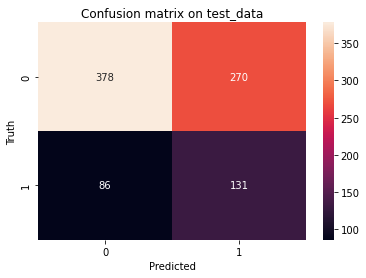

----------------------------
TP: 131
TN: 378
FP: 270
FN: 86
F1-score: 0.42394822006472493
accuracy: 0.5884393063583815


In [ ]:
# this is the confusion matrix for test data 

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.title('Confusion matrix on test_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))


print('F1-score: {}'.format(f1_score(y_pred,y_test)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.58      0.68       648
           1       0.33      0.60      0.42       217

    accuracy                           0.59       865
   macro avg       0.57      0.59      0.55       865
weighted avg       0.69      0.59      0.62       865

